# Distributed Computing - Project 1




Question: Do we see the protagonist developing and maturing from a young girl to a women in both classics and fanfiction? In classic coming of age literature we expect to see the protagonist evolve throughout the book.  Do we observe this same development in fanfiction?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.Prepare Environment

### 1.1 Install Java, Pyspark and Spark NLP

In [2]:
import os

In [3]:
!apt-get update -qq
!apt-get install -y openjdk-8-jdk-headless -qq

Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u312-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u312-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Setting up ope

In [4]:
#Install Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


In [5]:
# Install Pyspark
! pip install --ignore-installed pyspark==2.4.4

# Install Spark NLP
! pip install --ignore-installed spark-nlp==2.6.2

     |████████████████████████████████| 215.7 MB 54 kB/s 
     |████████████████████████████████| 197 kB 14.7 MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130392 sha256=c5f1850db4389d58ae91db6d9a466bfaa5b44b18a0a8546b67812fd9a5138017
  Stored in directory: /root/.cache/pip/wheels/11/48/19/c3b6b66e4575c164407a83bc065179904ddc33c9d6500846f0
Successfully built pyspark
     |████████████████████████████████| 128 kB 9.8 MB/s 


### 1.2 Start  Spark Session

In [6]:
import sparknlp
spark = sparknlp.start()

from pyspark.ml import Pipeline
from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.base import *

## 2.Get Classics Corpus

### 2.1 Convert txt files into Python Dataframe

In [7]:
import pandas as pd
import os
import re

In [8]:
directory ="/content/drive/MyDrive/Distributed-Computing/data/classic_literature/" #Change according to path
# directory ="data/classic_literature/" #Change according to path
text_type = 'C'

classics_df = pd.DataFrame(columns=['id', 'type', 'text'])

for filename in os.listdir(directory):
#filename = "data/classic_literature/45.txt"
    file_ext = os.path.basename(filename).rsplit('.',1)[1] #Get file extension
    if file_ext == "txt":
        with open(directory + '/' + filename, 'r') as file:
            text_id = os.path.basename(filename).rsplit('.',1)[0]
            corpus = file.read()
            corpus = re.sub(';', ' ', corpus)
            corpus = corpus.replace('Chapter', '')
            classics_df.loc[len(classics_df.index)] = [text_id, text_type, corpus]

In [9]:
classics_df

,id,type,text
0,1342,C,\n\n\n\n\nPRIDE AND PREJUDICE\n\nBy Jane Auste...
1,768,C,\n\n\n\nTranscribed from the 1910 John Murray ...
2,1260,C,\n\n\n\n\nTranscribed from the 1897 Service & ...
3,514,C,\n\n\n\nLITTLE WOMEN\n\n\nby\n\nLouisa May Alc...
4,1905,C,"\n\n\n\n\nTHE GOVERNESS \n\nOR, THE LITTLE FEM..."
5,113,C,\n\n\n\n\n\n\n\n\n\n\nIn Honor of Lisa Hart's ...
6,145,C,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMiddlemarch\n\n\...
7,45,C,\n\n\n\n\n ANNE OF GREEN GABL...


### 2.2 Convert Python Dataframe into Spark Dataframe

In [10]:
import re
import pyspark
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SQLContext

#sc =  pyspark.SparkContext("local[*]", "Test Context")
sqlContext = SQLContext(spark)

In [11]:
df_Spark_classics = sqlContext.createDataFrame(classics_df) #Pyspark SQL dataframe

## 3.Get Fanfictions Corpus

### 3.1 Convert txt files into Python Dataframe

In [12]:
directory ="/content/drive/MyDrive/Distributed-Computing/data/fanfiction/" #Change according to path
# directory ="data/fanfiction/" #Change according to path
text_type = 'F'

fanfictions_df = pd.DataFrame(columns=['id', 'type', 'text'])

for filename in os.listdir(directory):
    file_ext = os.path.basename(filename).rsplit('.',1)[1] #Get file extension
    if file_ext == "txt":
        with open(directory + '/' + filename, 'r') as file:
            text_id = os.path.basename(filename).rsplit('.',1)[0]
            corpus = file.read()
            corpus = corpus.replace('Chapter', '')
            corpus = re.sub(';', ' ', corpus)
            fanfictions_df.loc[len(fanfictions_df.index)] = [text_id, text_type, corpus]

In [13]:
fanfictions_df

,id,type,text
0,fanfic_1536152,F,"1\nGoing back was the worst.I had hoped that,..."
1,fanfic_35367502,F,1\n“Lily there’s a boy at the door!”\nThe gin...
2,fanfic_33183868,F,1\n \n\n \n\nThere was something luminescent ...
3,fanfic_7441657,F,"1\nPrologue\nOctober 31, 1981\nThe view out t..."
4,fanfic_24025603,F,"1\nDisclaimer: I, by no means, claim to own a..."
5,fanfic_23824330,F,1\nAmy sits facing the window of her room. He...
6,fanfic_25042705,F,"1\n“But, really,” said Mrs. Bennet rather lou..."
7,fanfic_36819574,F,"1\nI was born in sunlight, and dragged into d..."
8,fanfic_8523001,F,1\nThere was such a cultural veil of secrecy ...


### 3.2 Convert Python Dataframe into Spark Dataframe

In [14]:
df_Spark_fanfictions = sqlContext.createDataFrame(fanfictions_df) #Pyspark SQL dataframe

## 4 Preprocess Texts

### 4.1 Create Preprocessing Pipeline

Create pipeline to preprocess the spark dataframe texts.

Each of these classes receive an input column and creates the output column.
At the end of the pipeline, we will have a dataframe with all of the columns that are created on the fly and their results.

The **last column** generated, in this case **token_features** is the one that has all the words after being preprocessed, removing stop words, etc.

In [15]:
#https://medium.com/spark-nlp/spark-nlp-101-document-assembler-500018f5f6b5
document = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document") \
    .setCleanupMode("shrink_full") #remove new lines and tabs, plus shrinking spaces and blank lines.

#https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp.annotator.Tokenizer.html
token = Tokenizer()\
    .setInputCols(['document'])\
    .setOutputCol('token')

#https://nlp.johnsnowlabs.com/docs/en/annotators
normalizer = Normalizer() \
    .setInputCols(["token"]) \
    .setOutputCol("normalized") \
    .setLowercase(True) \
    .setCleanupPatterns(["""[^A-Za-z]"""]) # remove punctuations and alphanumeric chars

finisher = Finisher() \
    .setInputCols(["normalized"]) \
    .setOutputCols(["token_features"]) \
    .setOutputAsArray(True) \
    .setCleanAnnotations(False)

In [16]:
nlp_pipeline_lr = Pipeline(
        stages=[document, 
                token,
                normalizer,
                finisher])

### 4.2 Apply Pipeline to Spark Dataframes

#### 4.2.1 Classics

In [31]:
processed_classics_df = nlp_pipeline_lr.fit(df_Spark_classics).transform(df_Spark_classics)

#Show Token Features column
# processed_classics_df.select("token_features").show(truncate=200) 

#### 4.2.2 Fanfictions

In [32]:
processed_fanfictions_df = nlp_pipeline_lr.fit(df_Spark_fanfictions).transform(df_Spark_fanfictions)

#Show Token Features column
# processed_fanfictions_df.select("token_features").show(truncate=200) 

------------------------------------------------------------------------------------------------------------

At this point we have two preprocessed Spark Dataframes where each row belongs two one book. The column of interest is **"token_features"**, which contains all the **tokens** of the corpus.

1.   **processed_classics_df**: Contains the eiight classics (one per row)
2.   **processed_fanfictions_df**: Contains the eiight fanfictions (one per row)

--> From here, we can start doing additional processing like TF-IDF or other stuff to obtain the information we want.






### 4.3 Final Spark DataFrame of all Texts

In [33]:
# Classics Spark DataFrame
final_classics_df = processed_classics_df.select(['id', 'type', 'token_features'])

# Fanfictions Spark DataFrame
final_fanfictions_df = processed_fanfictions_df.select(['id', 'type', 'token_features'])

In [34]:
# Combine Classics and Fanfic DataFrames
final_df = final_classics_df.union(final_fanfictions_df)
final_df.schema

StructType(List(StructField(id,StringType,true),StructField(type,StringType,true),StructField(token_features,ArrayType(StringType,true),true)))

In [35]:
# SQL table named 'texts' from the final_df Spark dataframe
final_df.createOrReplaceTempView('texts')

## 5 Analysis: Protagonist Development

### 5.1 Setup pyspark.sql

In [36]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType
from pyspark.sql.functions import concat_ws, split, col, concat, lit, udf, col

spark = SparkSession.builder.master("local[*]").appName("temp").getOrCreate()

### 5.2 Helper Functions for Analysis

In [37]:
# User Defined Functions
@udf()
def get_indices(lst, word_lst):
  ''' Obtain location (i.e. indices) when the given word(s) appear '''
  word_lst = word_lst.split('/')
  indices = [i for i, x in enumerate(lst) if x in word_lst]
  return indices

@udf()
def document_length(lst): 
  ''' Get the document length '''
  return(len(lst))

# Register UDFs to be used in SQL statements
spark.udf.register("get_indices" , get_indices)
spark.udf.register("document_length" , document_length)


<function __main__.document_length>

### 5.3 Apply the UDFs for Analysis

#### 5.3.1 Spark Dataframe of Results

In [38]:
# SQL query: determine where in the texts concepts of being a girl and a woman appear
indices_df = spark.sql('''select *, 
                          document_length(token_features) as length, 
                          get_indices(token_features, "girl/young") as girl, 
                          get_indices(token_features, "woman/lady/old") as woman, 
                          get_indices(token_features, "naive") as naive 
                        from texts'''
                      )

In [39]:
indices_df.show(truncate = 200)

+---------------+----+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------+
|             id|type|                                                                                                                                                                                          token_features|length|                                                                                              

#### 5.3.2 Pandas Dataframe of Results

In [40]:
# Convert to Pandas Dataframe for Visualizations
indices_pd = indices_df.toPandas()
indices_pd

,id,type,token_features,length,girl,woman,naive
0,1342,C,"[pride, and, prejudice, by, jane, austen, it, ...",121414,"[174, 734, 1295, 1732, 1847, 2102, 2606, 2706,...","[82, 417, 436, 491, 697, 819, 998, 1296, 1715,...",[]
1,768,C,"[transcribed, from, the, john, murray, edition...",115871,"[2268, 2445, 2825, 3142, 3728, 4723, 9471, 104...","[346, 349, 773, 1975, 2942, 3143, 3338, 3350, ...",[]
2,1260,C,"[transcribed, from, the, service, paton, editi...",185464,"[2236, 2981, 2987, 3223, 4262, 8217, 8261, 828...","[1782, 2013, 3637, 4261, 6718, 7344, 7485, 795...","[68927, 148724]"
3,514,C,"[little, women, by, louisa, may, alcott, conte...",186030,"[247, 998, 1017, 1082, 1308, 1533, 1558, 1651,...","[161, 202, 595, 596, 976, 1018, 1130, 1131, 15...",[]
4,1905,C,"[the, governess, or, the, little, female, acad...",50669,"[25, 494, 620, 703, 794, 2143, 3458, 3680, 486...","[547, 740, 2207, 5309, 5323, 5469, 6062, 6516,...",[]
5,113,C,"[in, honor, of, lisa, harts, th, birthday, the...",80712,"[121, 306, 451, 805, 820, 835, 976, 1045, 1568...","[26, 39, 437, 532, 567, 580, 1506, 1769, 2688,...",[]
6,145,C,"[middlemarch, by, george, eliot, new, york, an...",316288,"[254, 343, 966, 1223, 1597, 1648, 1798, 4524, ...","[395, 709, 1272, 1649, 1701, 2202, 2220, 4526,...","[5899, 9496, 22467, 58625, 100418, 163813]"
7,45,C,"[anne, of, green, gables, by, lucy, maud, mont...",102508,"[244, 2063, 2273, 2324, 2779, 2788, 2817, 2972...","[322, 971, 1682, 1718, 4309, 4836, 6263, 8772,...",[]
8,fanfic_1536152,F,"[going, back, was, the, worsti, had, hoped, th...",171598,"[204, 2449, 3087, 3740, 3757, 3826, 6077, 6091...","[766, 1703, 3000, 3485, 3542, 9752, 9829, 9971...",[]
9,fanfic_35367502,F,"[lily, theres, a, boy, at, the, door, the, gin...",106735,"[10, 1016, 4136, 4146, 4170, 4956, 5661, 9080,...","[451, 2430, 3133, 3306, 3317, 3508, 4258, 1122...",[]


## 6. Visualizations

In [41]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 432x288 with 0 Axes>

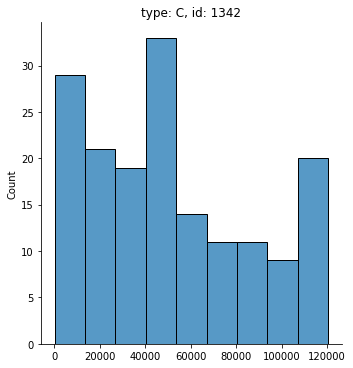

<Figure size 432x288 with 0 Axes>

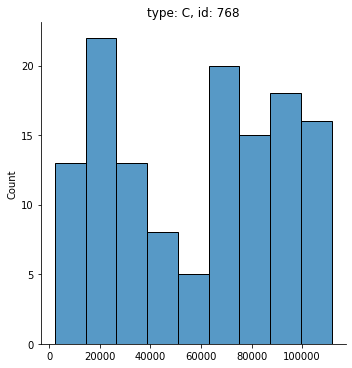

<Figure size 432x288 with 0 Axes>

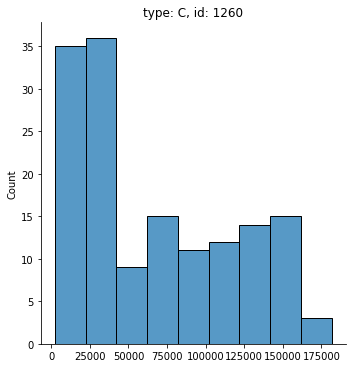

<Figure size 432x288 with 0 Axes>

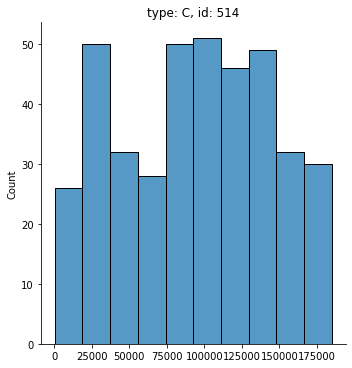

<Figure size 432x288 with 0 Axes>

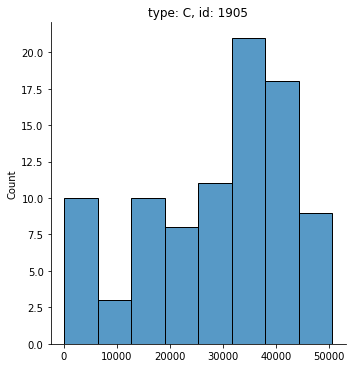

<Figure size 432x288 with 0 Axes>

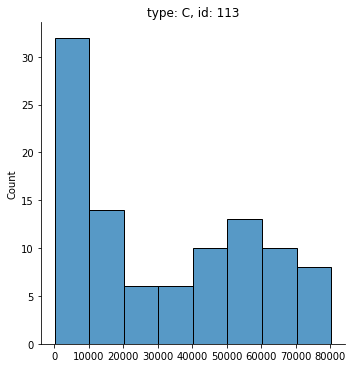

<Figure size 432x288 with 0 Axes>

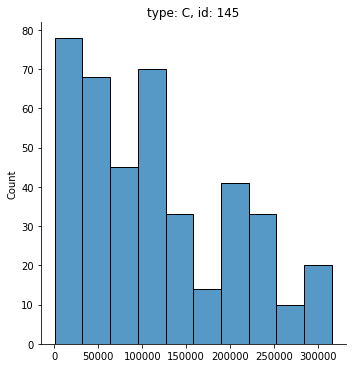

<Figure size 432x288 with 0 Axes>

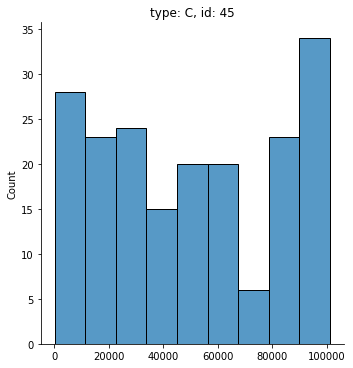

<Figure size 432x288 with 0 Axes>

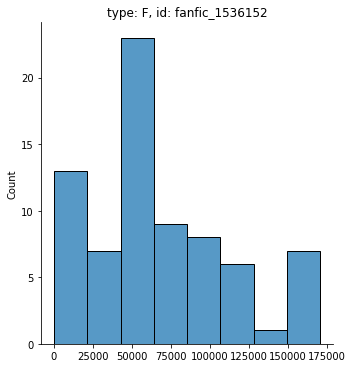

<Figure size 432x288 with 0 Axes>

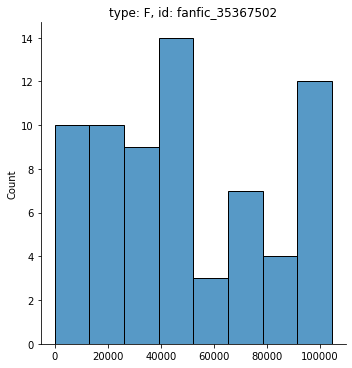

<Figure size 432x288 with 0 Axes>

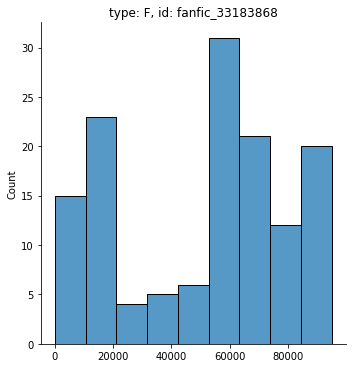

<Figure size 432x288 with 0 Axes>

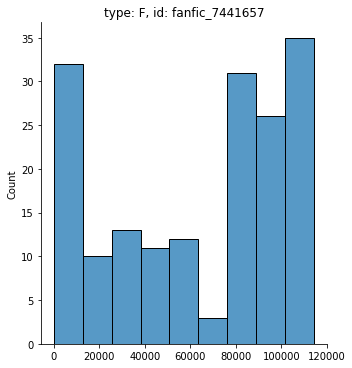

<Figure size 432x288 with 0 Axes>

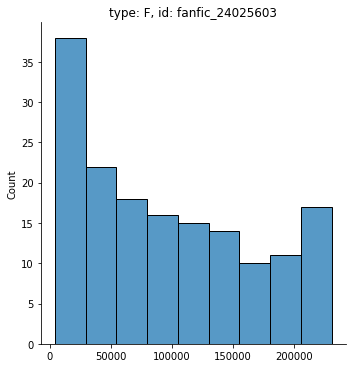

<Figure size 432x288 with 0 Axes>

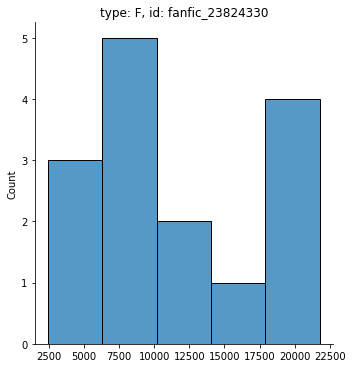

<Figure size 432x288 with 0 Axes>

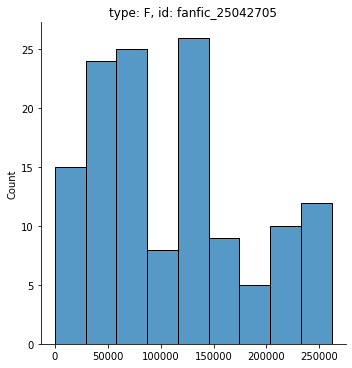

<Figure size 432x288 with 0 Axes>

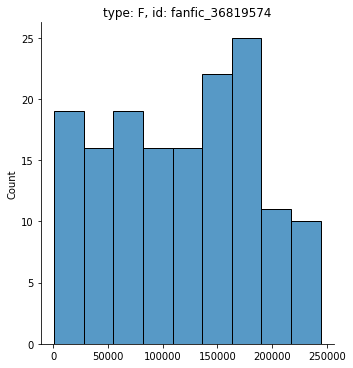

<Figure size 432x288 with 0 Axes>

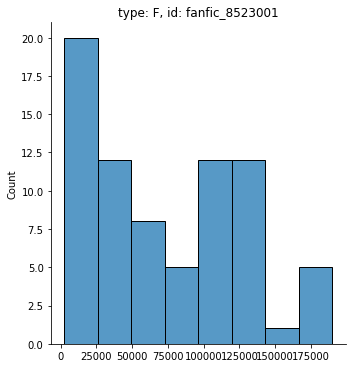

In [42]:
for i in range(len(indices_pd)):
  fig = plt.figure()
  sns.displot(json.loads(indices_pd['girl'][i]))
  plt.title(f"type: {indices_pd['type'][i]}, id: {indices_pd['id'][i]}")
  plt.show()

## 7. Conclusions

We observe that concepts of being a girl and being young appear most at the beginning of the texts. Additionally, these ideas of 'girlhood'  sometimes reappear again at the end of the texts.


The graphs above indicate that this trend is slightly more pronounced in classic literature than in fanfiction. This is an initial analysis that we did not build on for the presentation, but it yields an interesting finding that could be studied at a future time. 